<a href="https://colab.research.google.com/github/Reza-Pourang/Chain-Stores-5-Year-Sales-Analysis-Predictive-Modeling-/blob/main/ChainStores_5Years_EDA%26Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd

#Load the datasets and Create an ExcelFile object
from google.colab import drive
drive.mount('/content/drive')
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chain-5Years-Cleaned.csv')

In [4]:
#Initial check
print(Data.head(5))
print('\n')
print(Data.dtypes)
print('\n')
print(Data.info())

   CustomerCode  SellerCode  ProductCode                 CustomerName  \
0     1010005.0   1400059.0    1102001.0  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥   
1     1010261.0   1400086.0    1102002.0       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ±ŸÅÿßŸá   
2     1010261.0   1400086.0    1101006.0       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ±ŸÅÿßŸá   
3     1010261.0   1400086.0    1103004.0       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ±ŸÅÿßŸá   
4     1010276.0   1400086.0    1103004.0       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ±ŸÅÿßŸá   

                                      StoreName                    SellerName  \
0                       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ⁄©ÿ±ŸÖÿßŸÜ  ŸÅÿ±Ÿàÿ¥ŸÜÿØŸá ŸÅÿ±Ÿàÿ¥⁄ØÿßŸáŸáÿßŸä ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä   
1  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ±ŸÅÿßŸá ÿ™Ÿáÿ±ÿßŸÜ- ÿ¨ŸÜŸàÿ® ÿ∫ÿ±ÿ®- ÿßŸÑŸÖÿßÿ≥ ÿ¥Ÿáÿ±36291                ÿ≠ÿ≥ŸäŸÜ ÿØŸÑÿßŸÑŸä ÿ≤ÿßÿØ   
2  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ±ŸÅÿßŸá ÿ™Ÿáÿ±ÿßŸÜ- ÿ¨ŸÜŸàÿ® ÿ∫ÿ±ÿ®- ÿßŸÑŸÖÿßÿ≥ ÿ¥Ÿáÿ±36291                ÿ≠ÿ≥ŸäŸÜ ÿØŸÑÿßŸÑŸä ÿ≤ÿßÿØ   
3  ŸÅÿ±

In [5]:
#Monthly Sales Analysis

MonthlySales = Data.groupby('MonthNumeric')['Cartons'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)
MonthlySales['Cartons'] = MonthlySales['Cartons'].apply(lambda x: f"{x:,}")

print(MonthlySales)

    MonthNumeric  Cartons
4              5  359,633
11            12  347,347
7              8  344,615
6              7  332,978
10            11  316,590
9             10  275,098
5              6  274,775
8              9  265,750
3              4  265,401
2              3  236,075
1              2  162,098
0              1  113,170


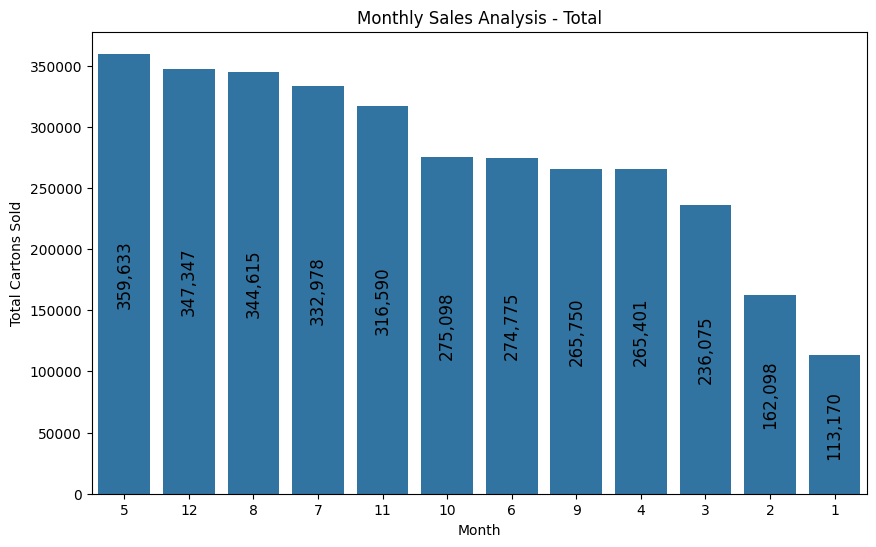

In [6]:
#Monthly Sales Analysis - Plot
import seaborn as sns
import matplotlib.pyplot as plt

MonthlySales = Data.groupby('MonthNumeric')['Cartons'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)

#Sort the DataFrame by 'Cartons' in descending order
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)

#Reorder the categories in Seaborn's barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=MonthlySales, order=MonthlySales['MonthNumeric'])

#Add rotated text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='center', fontsize=12, rotation=90)

#Titles and labels
plt.title('Monthly Sales Analysis - Total')
plt.xlabel('Month')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-7-0c97cc54b57c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(Data, x="MonthNumeric", y="Cartons", hue="Year", estimator="sum", ci=None, marker="o")


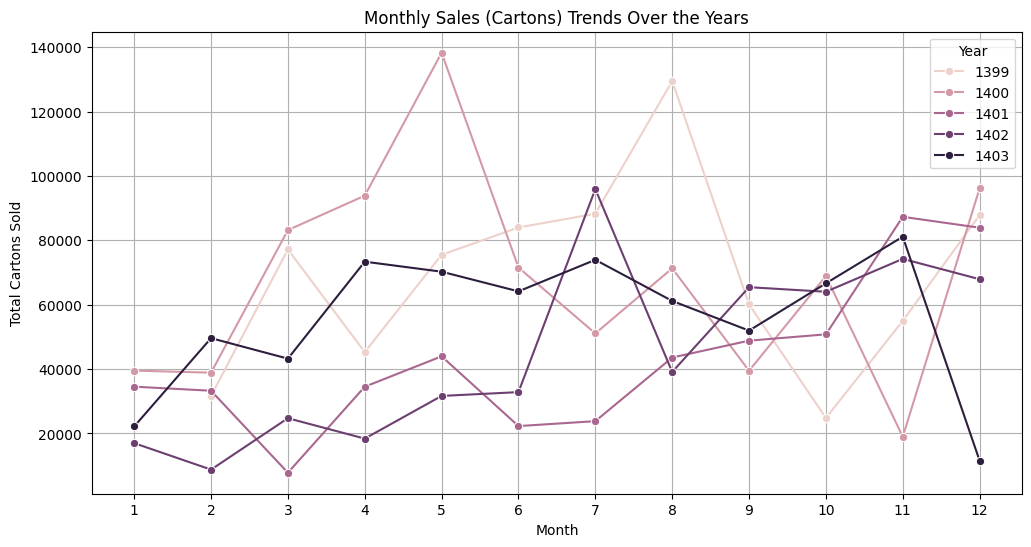

In [7]:
#Monthly Sales (Cartons) Trends Over the Years

plt.figure(figsize=(12, 6))
sns.lineplot(Data, x="MonthNumeric", y="Cartons", hue="Year", estimator="sum", ci=None, marker="o")
plt.title("Monthly Sales (Cartons) Trends Over the Years")
plt.xlabel("Month")
plt.ylabel("Total Cartons Sold")
plt.xticks(range(1, 13))  # Ensure x-axis has correct months
plt.legend(title="Year")
plt.grid(True)
plt.show()

In [8]:
#Seasonal Sales Analysis

import seaborn as sns
import matplotlib.pyplot as plt

#Define seasons based on MonthNumeric
def AssignSeason(month):
  if month in [1, 2, 3]:
    return 'Season 1 (Spring)'
  if month in [4, 5, 6]:
    return 'Season 2 (Summer)'
  if month in [7, 8, 9]:
    return 'Season 3 (Autumn)'
  if month in [10, 11, 12]:
    return 'Season 4 (Winter)'
  else:
    return 'Unknown'

#Apply the function to create a new column
Data['Season'] = Data['MonthNumeric'].apply(AssignSeason)

#Group by Season and calculate cartons
SeasonalSales = Data.groupby('Season')['Cartons'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='Cartons', ascending=False)
SeasonalSales["Cartons"] = SeasonalSales["Cartons"].apply(lambda x: f"{x:,}")

print(SeasonalSales)

              Season  Cartons
2  Season 3 (Autumn)  943,343
3  Season 4 (Winter)  939,035
1  Season 2 (Summer)  899,809
0  Season 1 (Spring)  511,343


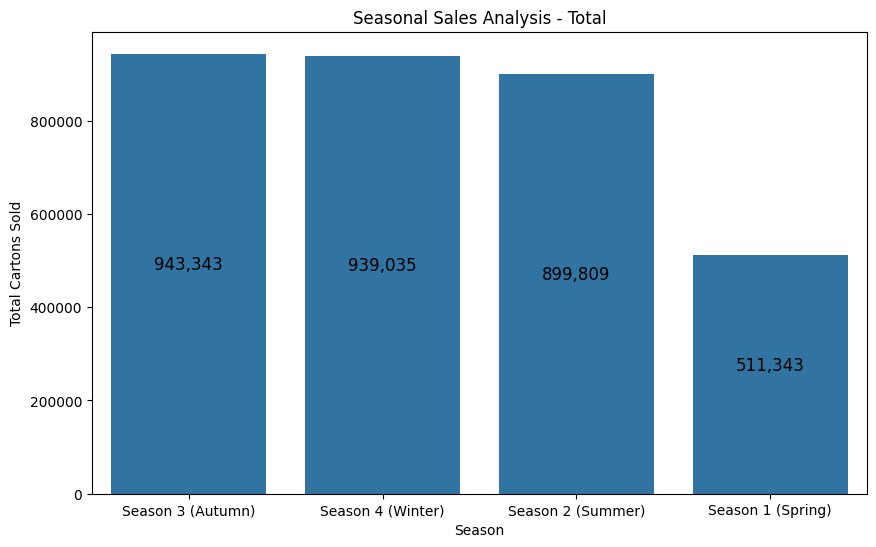

In [9]:
#Seasonal Sales Analysis - Plot
SeasonalSales = Data.groupby('Season')['Cartons'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='Cartons', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='Cartons', data=SeasonalSales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Seasonal Sales Analysis - Total')
plt.xlabel('Season')
plt.ylabel('Total Cartons Sold')
plt.show()

<ipython-input-10-1950772f5603>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=SeasonalSales, x="Season", y="Cartons", hue="Year", estimator="sum", ci=None)


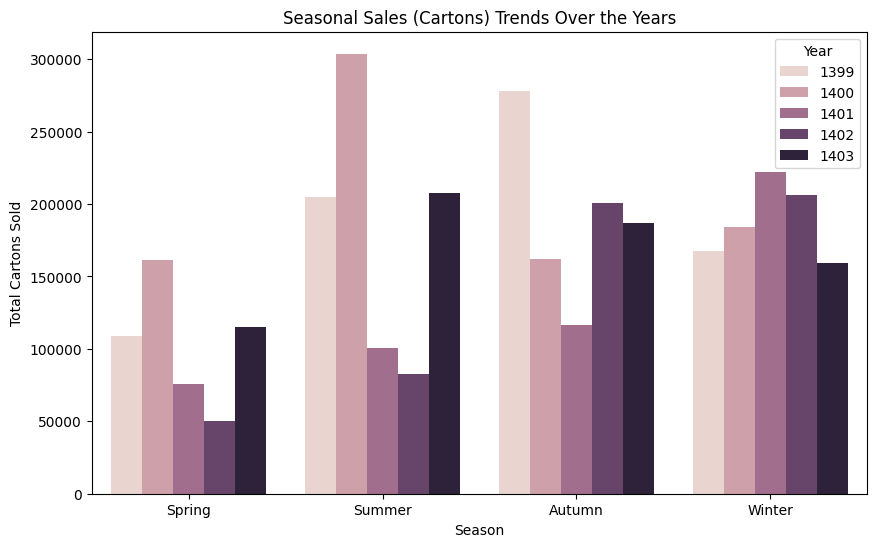

In [10]:
#Seasonal Sales Trends Over the Years

SeasonalSales = Data.groupby(['Year', 'MonthNumeric'])['Cartons'].sum().reset_index()
SeasonalSales["Season"] = SeasonalSales["MonthNumeric"].apply(lambda x:
    "Spring" if x in [1, 2, 3] else
    "Summer" if x in [4, 5, 6] else
    "Autumn" if x in [7, 8, 9] else
    "Winter"
)

plt.figure(figsize=(10, 6))
sns.barplot(data=SeasonalSales, x="Season", y="Cartons", hue="Year", estimator="sum", ci=None)
plt.title("Seasonal Sales (Cartons) Trends Over the Years")
plt.xlabel("Season")
plt.ylabel("Total Cartons Sold")
plt.legend(title="Year")
plt.show()

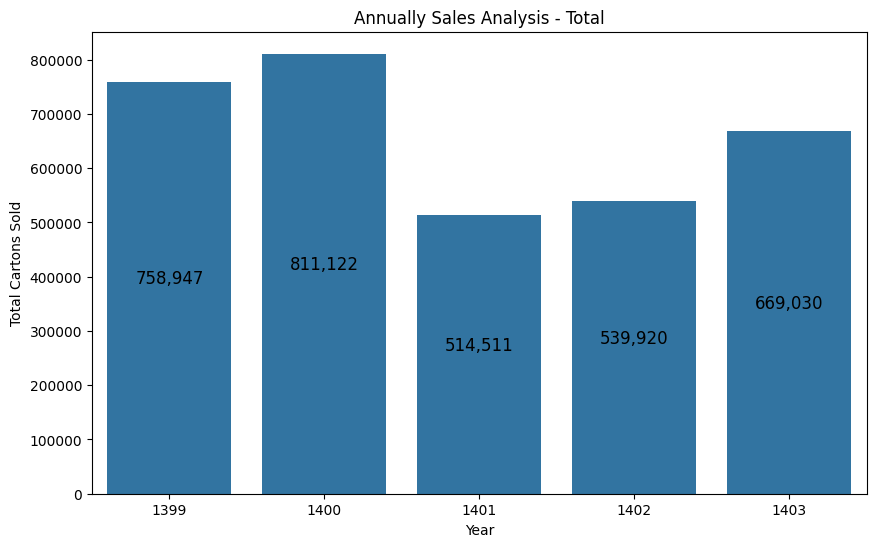

In [11]:
#Annually Sales Analysis - Plot
AnnuallySales = Data.groupby('Year')['Cartons'].sum().reset_index()
AnnuallySales = AnnuallySales.sort_values(by='Cartons', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Cartons', data=AnnuallySales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Annually Sales Analysis - Total')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.show()

In [12]:
#Top Stores (Annually)

YearlyTopStores = Data.groupby(['StoreName', 'Year'])['Cartons'].sum().reset_index()
YearlyTopStores = YearlyTopStores.sort_values(by='Cartons', ascending=False)
YearlyTopStores["Cartons"] = YearlyTopStores["Cartons"].apply(lambda x: f"{x:,}")
TopStoresByYear = YearlyTopStores.groupby('Year').head(10)

Years = [1399, 1400, 1401, 1402, 1403, 1404]

for year in Years:
  print(TopStoresByYear[TopStoresByYear['Year'] == year].head(10))
  print('\n')

                           StoreName  Year Cartons
365         ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™4  1399  43,066
360        ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™ 5  1399  35,099
328          ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ÿßŸáŸàÿßÿ≤  1399  34,527
465  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥(ÿ¨ÿßŸÜÿ®Ÿà2)  1399  32,553
660        ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿØŸäÿßŸÜ ⁄Øÿ≥ÿ™ÿ± Ÿæÿßÿ±ÿ≥ŸäÿßŸÜ  1399  31,891
460  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥(ÿ¨ÿßŸÜÿ®Ÿà1)  1399  26,877
354         ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ÿµŸÅÿßÿØÿ¥ÿ™  1399  24,949
370         ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™6  1399  23,809
438    ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥ ŸÇÿ≤ŸàŸäŸÜ  1399  21,226
469             ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ¥ÿßŸÜ⁄© ÿ™Ÿáÿ±ÿßŸÜ  1399  20,822


                           StoreName  Year Cartons
361        ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™ 5  1400  34,440
366         ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™4  1400  32,428
466  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥

In [13]:
#Top 20 and Low Perform Stores (5 Years)

TopStores = Data.groupby('StoreName')['Cartons'].sum().reset_index()
TopStores = TopStores.sort_values(by='Cartons', ascending=False)
TopStores["Cartons"] = TopStores["Cartons"].apply(lambda x: f"{x:,}")

print(TopStores[['StoreName', 'Cartons']].head(20))
print('\n')

LowPerformStores = Data.groupby('StoreName')['Cartons'].sum().reset_index()
LowPerformStores = LowPerformStores.sort_values(by='Cartons', ascending=True)
LowPerformStores["Cartons"] = LowPerformStores["Cartons"].apply(lambda x: f"{x:,}")

print(LowPerformStores[['StoreName', 'Cartons']].head(20))

                               StoreName  Cartons
182             ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™4  177,007
181            ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™ 5  152,229
205      ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥(ÿ¨ÿßŸÜÿ®Ÿà1)  149,992
179             ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ÿµŸÅÿßÿØÿ¥ÿ™  107,899
207                 ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ¥ÿßŸÜ⁄© ÿ™Ÿáÿ±ÿßŸÜ  103,061
206      ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥(ÿ¨ÿßŸÜÿ®Ÿà2)   75,348
186             ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÖÿ±ŸàÿØÿ¥ÿ™   68,026
191         ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ⁄©ÿ±ŸÖÿßŸÜÿ¥ÿßŸá 2   66,812
200        ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥ ŸÇÿ≤ŸàŸäŸÜ   64,244
172            ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ÿßŸáŸàÿßÿ≤ 2   63,568
198       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥ ÿ¥Ÿáÿ±Ÿäÿßÿ±   61,043
208                   ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ¥ÿßŸÜ⁄© ÿ±ÿ¥ÿ™   57,825
176                ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ÿ±ÿ¥ÿ™   57,592
187               ŸÅÿ±

In [14]:
#Portion of annual sales for each of the top 10 stores in each year

AnnuallySales = Data.groupby('Year')['Cartons'].sum().reset_index()
AnnuallySales = AnnuallySales.sort_values(by='Cartons', ascending=False)

YearlyTopStores = Data.groupby(['StoreName', 'Year'])['Cartons'].sum().reset_index()
YearlyTopStores = YearlyTopStores.sort_values(by=['Year', 'Cartons'], ascending=[True, False])
TopStoresByYear = YearlyTopStores.groupby('Year').head(10)

#Calculate and print the portion of annual sales
for year in AnnuallySales['Year'].unique():
    TotalSalesYear = AnnuallySales.loc[AnnuallySales['Year'] == year, 'Cartons'].values[0]
    TopStoresYear = TopStoresByYear[TopStoresByYear['Year'] == year]

    print(f"Top Stores for Year {year} and their Portion of Annual Sales:\n")
    for index, row in TopStoresYear.iterrows():
        StoreName = row['StoreName']
        StoreSales = row['Cartons']
        portion = (StoreSales / TotalSalesYear) * 100
        print(f"{StoreName}: {StoreSales:,} cartons ({portion:.2f}%)")
    print("\n")

Top Stores for Year 1400 and their Portion of Annual Sales:

ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™ 5: 34,440 cartons (4.25%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™4: 32,428 cartons (4.00%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥(ÿ¨ÿßŸÜÿ®Ÿà2): 29,365 cartons (3.62%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ÿµŸÅÿßÿØÿ¥ÿ™: 25,261 cartons (3.11%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÖÿ±ŸàÿØÿ¥ÿ™: 23,840 cartons (2.94%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ¥ÿßŸÜ⁄© ÿ™Ÿáÿ±ÿßŸÜ: 23,503 cartons (2.90%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥(ÿ¨ÿßŸÜÿ®Ÿà1): 22,577 cartons (2.78%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿØŸäÿßŸÜ ⁄Øÿ≥ÿ™ÿ± Ÿæÿßÿ±ÿ≥ŸäÿßŸÜ: 19,420 cartons (2.39%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥ ŸÇÿ≤ŸàŸäŸÜ: 17,691 cartons (2.18%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÖÿ¥ŸáÿØ: 17,124 cartons (2.11%)


Top Stores for Year 1399 and their Portion of Annual Sales:

ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™4: 43,066 cartons (5.67%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥ ŸÅŸÑÿßÿ≠ÿ™ 5: 35,099 cartons (4.62%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ

In [15]:
#Top 20 and Low Perform Chain Stores (5 Years)

TopChainStores = Data.groupby('CustomerName')['Cartons'].sum().reset_index()
TopChainStores = TopChainStores.sort_values(by='Cartons', ascending=False)
TopChainStores["Cartons"] = TopChainStores["Cartons"].apply(lambda x: f"{x:,}")

print(TopChainStores[['CustomerName', 'Cartons']].head(20))
print('\n')

LowPerformChainStores = Data.groupby('CustomerName')['Cartons'].sum().reset_index()
LowPerformChainStores = LowPerformChainStores.sort_values(by='Cartons', ascending=True)
LowPerformChainStores["Cartons"] = LowPerformChainStores["Cartons"].apply(lambda x: f"{x:,}")

print(LowPerformChainStores[['CustomerName', 'Cartons']].head(20))

                           CustomerName    Cartons
109         ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥  1,140,185
110   ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥    530,966
73         ÿ¥ÿ±⁄©ÿ™ ŸáÿßŸäŸæÿ± ŸÖÿßÿ±⁄©ÿ™ŸáÿßŸä ŸÖÿßŸÅ Ÿæÿßÿ±ÿ≥    258,670
111            ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸàÿ¥ÿßŸÜ⁄©    212,893
115              ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ±ŸÅÿßŸá    191,854
57              ÿ¥ÿ±⁄©ÿ™ ÿÆÿØŸÖÿßÿ™ ⁄©ÿßŸÑÿßŸä ÿ¥Ÿáÿ±ŸàŸÜÿØ    179,259
53   ÿ¥ÿ±⁄©ÿ™ ÿ®ÿßÿ≤ÿ±⁄ØÿßŸÜŸä ÿ≥ÿßŸÖÿßŸÜ ÿßŸÜÿØŸäÿ¥ÿßŸÜ ÿßŸÖÿ±ÿ™ÿßÿ™    139,317
116       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ≥ÿ™ÿßÿ±Ÿá ÿ∑ŸÑÿßŸäŸä     97,488
117       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ≥ÿ±ÿ≤ŸÖŸäŸÜ ÿÆÿ±ŸäÿØ     76,361
122     ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ŸÜÿ¨ŸÖ ÿÆÿßŸàÿ±ŸÖŸäÿßŸÜŸá     66,148
120       ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ŸÅÿßŸÖŸäŸÑŸä ŸÖÿØÿ±ŸÜ     62,649
114  ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿØŸäÿßŸÜ ⁄Øÿ≥ÿ™ÿ±Ÿæÿßÿ±ÿ≥ŸäÿßŸÜ     62,175
72                ÿ¥ÿ±⁄©ÿ™ ŸÜŸàÿ¢Ÿàÿ±ÿßŸ

In [16]:
#Portion of annual sales for each of the top 10 chain stores in each year

AnnuallySales = Data.groupby('Year')['Cartons'].sum().reset_index()
AnnuallySales = AnnuallySales.sort_values(by='Cartons', ascending=False)

#Second part: Calculate and print portion of annual sales for top chain stores
for year in AnnuallySales['Year'].unique():
    TotalSalesYear = AnnuallySales.loc[AnnuallySales['Year'] == year, 'Cartons'].values[0]

    #Filter TopChainStores for the current year and get top 10
    TopStoresYear = Data[Data['Year'] == year].groupby('CustomerName')['Cartons'].sum().reset_index()
    TopStoresYear = TopStoresYear.sort_values(by=['Cartons'], ascending=[False]).head(10)
    TopStoresYear["Cartons"] = TopStoresYear["Cartons"].apply(lambda x: f"{x:,}")

    print(f"Top Chain Stores for Year {year} and their Portion of Annual Sales:\n")
    for index, row in TopStoresYear.iterrows():
        StoreName = row['CustomerName']
        StoreSales = row['Cartons']

        #Convert StoreSales to numeric to do calculation
        StoreSalesNumeric = int(StoreSales.replace(',', ''))
        portion = (StoreSalesNumeric / TotalSalesYear) * 100
        print(f"{StoreName}: {StoreSales} cartons ({portion:.2f}%)")
    print("\n")

Top Chain Stores for Year 1400 and their Portion of Annual Sales:

ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥: 285,825 cartons (35.24%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸàÿ±ÿ≥ÿ™ ŸÖÿØÿ±ŸÜ Ÿæÿßÿ±ÿ≥: 127,724 cartons (15.75%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ±ŸÅÿßŸá: 110,748 cartons (13.65%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸàÿ¥ÿßŸÜ⁄©: 46,890 cartons (5.78%)
ÿ¥ÿ±⁄©ÿ™ ŸáÿßŸäŸæÿ± ŸÖÿßÿ±⁄©ÿ™ŸáÿßŸä ŸÖÿßŸÅ Ÿæÿßÿ±ÿ≥: 42,902 cartons (5.29%)
ÿ¥ÿ±⁄©ÿ™ ÿÆÿØŸÖÿßÿ™ ⁄©ÿßŸÑÿßŸä ÿ¥Ÿáÿ±ŸàŸÜÿØ: 29,100 cartons (3.59%)
ÿ¥ÿ±⁄©ÿ™ ÿ®ÿßÿ≤ÿ±⁄ØÿßŸÜŸä ÿ≥ÿßŸÖÿßŸÜ ÿßŸÜÿØŸäÿ¥ÿßŸÜ ÿßŸÖÿ±ÿ™ÿßÿ™: 27,205 cartons (3.35%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ≥ÿ±ÿ≤ŸÖŸäŸÜ ÿÆÿ±ŸäÿØ: 23,636 cartons (2.91%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿ≥ÿ™ÿßÿ±Ÿá ÿ∑ŸÑÿßŸäŸä: 20,877 cartons (2.57%)
ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿØŸäÿßŸÜ ⁄Øÿ≥ÿ™ÿ±Ÿæÿßÿ±ÿ≥ŸäÿßŸÜ: 19,492 cartons (2.40%)


Top Chain Stores for Year 1399 and their Portion of Annual Sales:

ŸÅÿ±Ÿàÿ¥⁄ØÿßŸá ÿ≤ŸÜÿ¨Ÿäÿ±Ÿá ÿßŸä ÿßŸÅŸÇ ⁄©Ÿàÿ±Ÿàÿ¥: 282,298 cartons (37.20%)
ŸÅÿ

In [17]:
#Top Product Group (5 Years)

TopProductGroup = Data.groupby('ProductGroup')['Cartons'].sum().reset_index()
TopProductGroup = TopProductGroup.sort_values(by='Cartons', ascending=False)
TopProductGroup["Cartons"] = TopProductGroup["Cartons"].apply(lambda x: f"{x:,}")

print(TopProductGroup[['ProductGroup', 'Cartons']].head())

             ProductGroup    Cartons
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  2,553,490
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ    381,316
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ    175,004
4  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ    108,003
3          ⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä     75,717


In [18]:
#Product Group (Per Year)

for year in Data['Year'].unique():
    YearlyTopProductGroup = Data[Data['Year'] == year].groupby('ProductGroup')['Cartons'].sum().reset_index()
    YearlyTopProductGroup = YearlyTopProductGroup.sort_values(by='Cartons', ascending=False)
    YearlyTopProductGroup["Cartons"] = YearlyTopProductGroup["Cartons"].apply(lambda x: f"{x:,}")

    print(f"Top Product Groups for Year {year}:\n")
    print(YearlyTopProductGroup[['ProductGroup', 'Cartons']].head())
    print('\n')

Top Product Groups for Year 1399:

             ProductGroup  Cartons
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  533,801
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ  147,430
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ   41,556
3  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ   36,160


Top Product Groups for Year 1400:

             ProductGroup  Cartons
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  570,860
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ  144,340
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ   62,911
4  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ   23,977
3          ⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä    9,034


Top Product Groups for Year 1401:

             ProductGroup  Cartons
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  420,322
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ   34,180
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ   29,424
3          ⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä   17,796
4  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ   12,789


Top Product Groups for Year 1402:

             ProductGroup  Cartons
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  462,282
4  ⁄©ŸÜÿ≥ÿ±Ÿ

In [19]:
#Product Group (Per Year)

for year in Data['Year'].unique():
    # Filter data for the specific year and aggregate cartons by ProductGroup
    YearlyTopProductGroup = Data[Data['Year'] == year].groupby('ProductGroup')['Cartons'].sum().reset_index()

    # Calculate the total cartons for the year
    total_cartons = YearlyTopProductGroup['Cartons'].sum()

    # Calculate the percentage of each ProductGroup
    YearlyTopProductGroup['Percentage'] = (YearlyTopProductGroup['Cartons'] / total_cartons) * 100

    # Sort the values in descending order based on Cartons
    YearlyTopProductGroup = YearlyTopProductGroup.sort_values(by='Cartons', ascending=False)

    # Format the values for better readability
    YearlyTopProductGroup["Cartons"] = YearlyTopProductGroup["Cartons"].apply(lambda x: f"{x:,}")
    YearlyTopProductGroup["Percentage"] = YearlyTopProductGroup["Percentage"].apply(lambda x: f"{x:.2f}%")

    # Print results
    print(f"Top Product Groups for Year {year}:\n")
    print(YearlyTopProductGroup[['ProductGroup', 'Cartons', 'Percentage']].head())  # Display top product groups
    print('\n')

Top Product Groups for Year 1399:

             ProductGroup  Cartons Percentage
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  533,801     70.33%
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ  147,430     19.43%
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ   41,556      5.48%
3  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ   36,160      4.76%


Top Product Groups for Year 1400:

             ProductGroup  Cartons Percentage
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  570,860     70.38%
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ  144,340     17.80%
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ   62,911      7.76%
4  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ   23,977      2.96%
3          ⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä    9,034      1.11%


Top Product Groups for Year 1401:

             ProductGroup  Cartons Percentage
0     ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ  420,322     81.69%
2                  ÿ≥ÿ≥ ⁄Øÿ±ŸÖ   34,180      6.64%
1                  ÿ≥ÿ≥ ÿ≥ÿ±ÿØ   29,424      5.72%
3          ⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä   17,796      3.46%
4  ⁄©ŸÜÿ≥ÿ±Ÿà

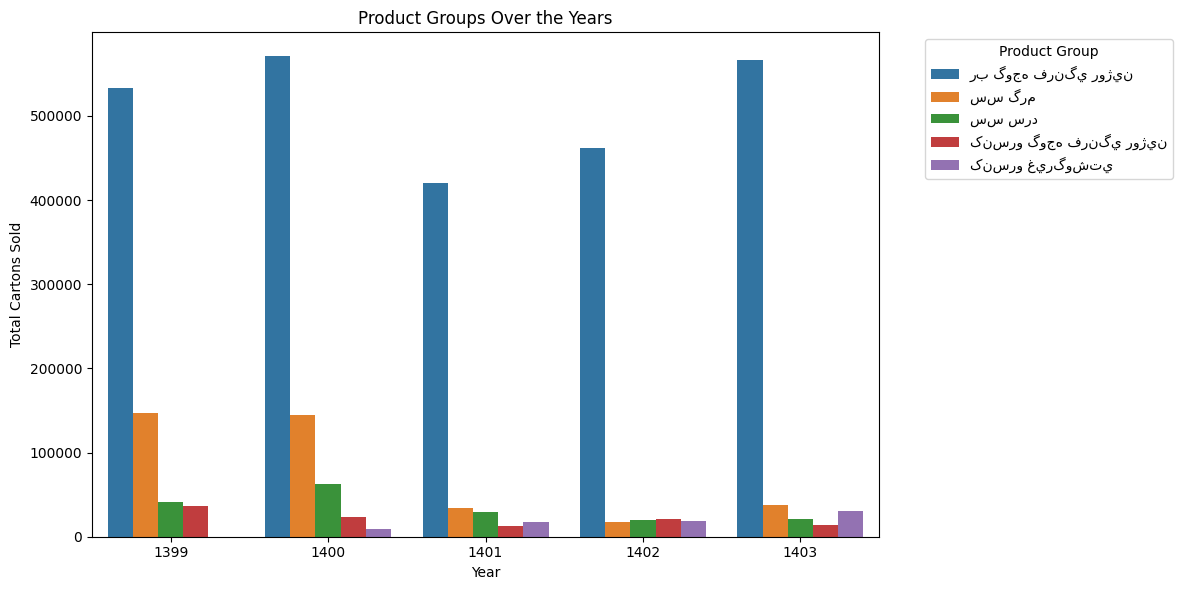

In [20]:
#Product Group (Per Year)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Get top product groups for each year
yearly_top_products = []
for year in Data['Year'].unique():
    YearlyTopProductGroup = Data[Data['Year'] == year].groupby('ProductGroup')['Cartons'].sum().reset_index()
    YearlyTopProductGroup = YearlyTopProductGroup.sort_values(by='Cartons', ascending=False)
    YearlyTopProductGroup["Cartons"] = YearlyTopProductGroup["Cartons"].apply(lambda x: f"{x:,}")
    YearlyTopProductGroup['Year'] = year  # Add year column
    yearly_top_products.append(YearlyTopProductGroup.head())  # Append top 5 product groups

#Combine yearly data
all_top_products = pd.concat(yearly_top_products)

#Convert 'Cartons' to numeric
all_top_products['Cartons'] = all_top_products['Cartons'].str.replace(',', '').astype(int)

#Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=all_top_products, x='Year', y='Cartons', hue='ProductGroup')
plt.title('Product Groups Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Cartons Sold')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
#Top and Low Perform Product Codes (5 Years)

TopProductCode = Data.groupby(['ProductCode', 'ProductName'])['Cartons'].sum().reset_index()
TopProductCode = TopProductCode.sort_values(by='Cartons', ascending=False)
TopProductCode["Cartons"] = TopProductCode["Cartons"].apply(lambda x: f"{x:,}")

print(TopProductCode[['ProductCode', 'ProductName', 'Cartons']].head(10))
print('\n')

LowPerformProductCode = Data.groupby(['ProductCode', 'ProductName'])['Cartons'].sum().reset_index()
LowPerformProductCode = LowPerformProductCode.sort_values(by='Cartons', ascending=True)
LowPerformProductCode["Cartons"] = LowPerformProductCode["Cartons"].apply(lambda x: f"{x:,}")

print(LowPerformProductCode[['ProductCode', 'ProductName', 'Cartons']].head(10))
print('\n')


display(TopProductCode[['ProductCode', 'ProductName', 'Cartons']].head(10).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]))
print('\n')

display(LowPerformProductCode[['ProductCode', 'ProductName', 'Cartons']].head(10).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]))


    ProductCode                                     ProductName    Cartons
0     1101002.0   ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà ÿ±Ÿà⁄òŸäŸÜ  800 ⁄Øÿ±ŸÖŸä  2,163,288
7     1102001.0                        ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá460⁄Øÿ±ŸÖŸä    270,766
3     1101006.0               ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ ÿ¥Ÿäÿ¥Ÿá 700 ⁄Øÿ±ŸÖŸä    223,137
11    1102005.0                      ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä Ÿáÿ≤ÿßÿ±ÿ¨ÿ≤Ÿäÿ±Ÿá 420 ⁄Øÿ±ŸÖŸä     73,084
5     1101008.0               ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ ÿ¥Ÿäÿ¥Ÿá 680 ⁄Øÿ±ŸÖŸä     61,930
1     1101004.0  ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà  ÿ±Ÿà⁄òŸäŸÜ  400 ⁄Øÿ±ŸÖŸä     61,417
8     1102002.0                        ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ™ŸÜÿØ460 ⁄Øÿ±ŸÖŸä     58,848
10    1102004.0                        ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ŸÅÿ±ÿßŸÜÿ≥ŸàŸä 420 ⁄Øÿ±ŸÖŸä     39,530
13    1102023.0              ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá 460⁄Øÿ±ŸÖŸä 12 ÿπÿØÿØŸä      37,768
24    1103007.0  ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ

In [22]:
#Correlation between unit price changes and cartons over the past 5 years

#Calculate price changes and carton sales per year
YearlyData = Data.groupby('Year').agg(
    UnitPriceChange=('UnitPrice', lambda x: x.iloc[-1] - x.iloc[0]),  #Price change within the year
    TotalCartons=('Cartons', 'sum')                                   #Total cartons sold in the year
                                     ).reset_index()

correlation = YearlyData['UnitPriceChange'].corr(YearlyData['TotalCartons'])
print(f"Correlation between unit price changes and the number of sold cartons: {correlation:.2f}")

Correlation between unit price changes and the number of sold cartons: -0.90


In [23]:
#Correlation between cartons and net sales over the past 5 years

#Calculate total cartons and net sales per year
YearlyData = Data.groupby('Year').agg(
    TotalCartons=('Cartons', 'sum'),   #Total cartons sold in the year
    TotalNetSales=('NetSales', 'sum')  #Total net sales for the year
).reset_index()

correlation = YearlyData['TotalCartons'].corr(YearlyData['TotalNetSales'])
print(f"Correlation between cartons and net sales: {correlation:.2f}")

Correlation between cartons and net sales: -0.33


In [ ]:
!pip install pmdarima

In [25]:
#Sales Forecast for the First Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1356.519, Time=1.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1352.053, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1354.045, Time=0.64 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1351.818, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1442.853, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1353.318, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1353.805, Time=1.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1352.276, Time=2.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1354.749, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1354.275, Time=1.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1350.687, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1352.659, Time=1.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1350.589, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1352.587, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1352.243, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1354.196, Time=1.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12]             : AIC=inf, Time=1.60 sec

Best model:  ARIMA(0,0,0)(0,0,2)[12] intercept
Total fit time: 16.571 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Forecasted Cartons for the Next 12 Months (ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ):
Month 60: 45,050 cartons
Month 61: 39,486 cartons
Month 62: 49,952 cartons
Month 63: 29,541 cartons
Month 64: 52,076 cartons
Month 65: 39,852 cartons
Month 66: 53,782 cartons
Month 67: 45,388 cartons
Month 68: 51,170 cartons
Month 69: 37,457 cartons
Month 70: 50,470 cartons
Month 71: 39,122 cartons

Average Monthly Forecast for ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ: 44,446 cartons


In [26]:
#Sales Forecast for the Second Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'ÿ≥ÿ≥ ⁄Øÿ±ŸÖ'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1128.133, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1129.573, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1129.431, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1126.147, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1129.944, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1130.004, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1131.652, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1128.051, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1127.832, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.890 seconds

Forecasted Cartons for the Next 12 Months (ÿ≥ÿ≥ ⁄Øÿ±ŸÖ):
Month 60: 4,204 cartons
Month 61: 4,204 cartons
Month 62: 4,204 cartons
Month 63: 4,204 cartons
Month 64: 4,204 cartons
Month 65: 4,204 cartons
Month 66: 4,204 cartons
Month 67: 4,204 cartons
Month 68: 4,204 cartons
Month 69: 4,204 cartons
Month 70: 4,204 cartons
Month 71: 4,204 cartons

Average Monthly Forecast for ÿ≥ÿ≥ ⁄Øÿ±ŸÖ: 4,204 cartons


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [27]:
#Sales Forecast for the Third Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = 'ÿ≥ÿ≥ ÿ≥ÿ±ÿØ'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1101.052, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1083.568, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1070.979, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1099.062, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1068.697, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1070.980, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1069.683, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1069.375, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1082.096, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1067.811, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1069.673, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1069.675, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=1071.700, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1071.320, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1065.812, Time=0.05 sec
 ARIMA(1,1,2)(1,0,0)[12]             : AIC=1067.673, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12]             : AIC=1067.674, Time=0.12 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=1069.672, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12]             : AIC=1067.418, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=1067.788, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1067.140, Time=0.01 sec
 ARIMA(0,1,3)(0,0,0)[12]             : AIC=1069.758, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=1069.366, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[12]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[12]          
Total fit time: 5.479 seconds

Forecasted Cartons for the Next 12 Months (ÿ≥ÿ≥ ÿ≥ÿ±ÿØ):
Month 60: 1,805 cartons
Month 61: 2,095 cartons
Month 62: 2,305 cartons
Month 63: 2,457 cartons
Month 64: 2,567 cartons
Month 65: 2,646 cartons
Month 66: 2,704 cartons
Month 67: 2,746 cartons
Month 68: 2,777 cartons
Month 69: 2,799 cartons
Month 70: 2,814 cartons
Month 71: 2,826 cartons

Average Monthly Forecast for ÿ≥ÿ≥ ÿ≥ÿ±ÿØ: 2,545 cartons


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
#Sales Forecast for the Fourth Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = '⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ'

# Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1005.634, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=999.553, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1003.648, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=998.109, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=999.370, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1001.246, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=997.794, Time=0.02 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=998.956, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=998.496, Time=0.10 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1000.065, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=999.692, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=995.817, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=996.980, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12]             : AIC=996.581, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12]             : AIC=998.190, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=996.097, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12]             : AIC=997.720, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12]             : AIC=987.789, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=989.363, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=989.192, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=991.016, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=985.809, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=987.401, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=987.238, Time=0.10 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=989.067, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=985.908, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=987.835, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=986.006, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12]          
Total fit time: 10.700 seconds

Forecasted Cartons for the Next 12 Months (⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ):
Month 59: 1,491 cartons
Month 60: 1,382 cartons
Month 61: 1,358 cartons
Month 62: 1,353 cartons
Month 63: 1,352 cartons
Month 64: 1,351 cartons
Month 65: 1,351 cartons
Month 66: 1,351 cartons
Month 67: 1,351 cartons
Month 68: 1,351 cartons
Month 69: 1,351 cartons
Month 70: 1,351 cartons

Average Monthly Forecast for ⁄©ŸÜÿ≥ÿ±Ÿà ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ÿ±Ÿà⁄òŸäŸÜ: 1,366 cartons


In [29]:
#Sales Forecast for the Fifth Product Group

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Specify the target
Target = '⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä'

#Filter data for the target product group
ProductData = Data[Data['ProductGroup'] == Target]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {Target}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({Target}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {Target}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=779.673, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=776.117, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=777.717, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=774.715, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=776.148, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=778.113, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=775.591, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=772.807, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=774.242, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12]             : AIC=774.273, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=776.232, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=773.703, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=763.523, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=765.105, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=765.119, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=767.105, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=762.609, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=764.088, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=764.085, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=766.084, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=763.540, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=765.501, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 2.258 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Forecasted Cartons for the Next 12 Months (⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä):
Month 46: 2,488 cartons
Month 47: 2,488 cartons
Month 48: 2,488 cartons
Month 49: 2,488 cartons
Month 50: 2,488 cartons
Month 51: 2,488 cartons
Month 52: 2,488 cartons
Month 53: 2,488 cartons
Month 54: 2,488 cartons
Month 55: 2,488 cartons
Month 56: 2,488 cartons
Month 57: 2,488 cartons

Average Monthly Forecast for ⁄©ŸÜÿ≥ÿ±Ÿà ÿ∫Ÿäÿ±⁄ØŸàÿ¥ÿ™Ÿä: 2,488 cartons


In [30]:
#Sales Forecast for the First Top Product

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Filter data for the target product group
ProductData = Data[Data['ProductCode'] == 1101002]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

#Auto-select best ARIMA model
model = pm.auto_arima(MonthlyCartons, seasonal=True, m=12,
                      trace=True, suppress_warnings=True, error_action="ignore")

#Train and Forecast
try:
    model_fit = ARIMA(MonthlyCartons, order=model.order,
                      seasonal_order=model.seasonal_order).fit()
    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {'ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà ÿ±Ÿà⁄òŸäŸÜ 800 ⁄Øÿ±ŸÖŸä'}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({'ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà ÿ±Ÿà⁄òŸäŸÜ 800 ⁄Øÿ±ŸÖŸä'}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {'ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà ÿ±Ÿà⁄òŸäŸÜ 800 ⁄Øÿ±ŸÖŸä'}: {AverageForecast:,.0f} cartons")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1332.110, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1335.169, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1333.588, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1423.207, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1333.854, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1332.044, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1334.025, Time=0.14 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1331.576, Time=0.08 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1333.573, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1333.492, Time=0.09 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1333.382, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1335.356, Time=0.13 sec
 ARIMA(0,0,0)(0,0,2)[12]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,2)[12] intercept
Total fit time: 2.435 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Forecasted Cartons for the Next 12 Months (ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà ÿ±Ÿà⁄òŸäŸÜ 800 ⁄Øÿ±ŸÖŸä):
Month 60: 39,133 cartons
Month 61: 30,369 cartons
Month 62: 40,092 cartons
Month 63: 24,790 cartons
Month 64: 46,314 cartons
Month 65: 34,803 cartons
Month 66: 46,082 cartons
Month 67: 38,004 cartons
Month 68: 43,657 cartons
Month 69: 29,757 cartons
Month 70: 42,232 cartons
Month 71: 31,257 cartons

Average Monthly Forecast for ÿ±ÿ® ⁄ØŸàÿ¨Ÿá ŸÅÿ±ŸÜ⁄ØŸä ŸÇÿ±ŸÖÿ≤ ÿ¢ÿ≥ÿßŸÜ ÿ®ÿßÿ≤ÿ¥Ÿà ÿ±Ÿà⁄òŸäŸÜ 800 ⁄Øÿ±ŸÖŸä: 37,208 cartons


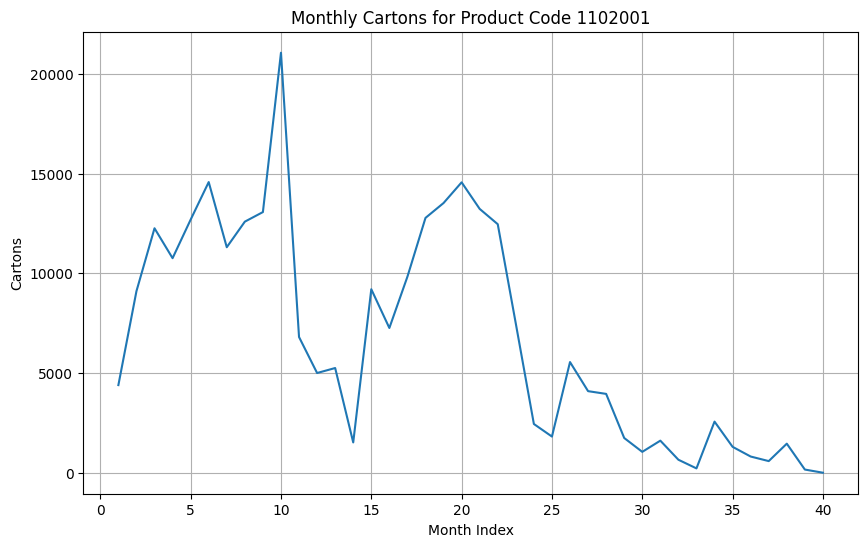


ADF Test Results:
ADF Statistic: -1.199997954032737
p-value: 0.6735965920550687
Critical Values:
   1%: -3.6327426647230316
   5%: -2.9485102040816327
   10%: -2.6130173469387756
Data is likely non-stationary.

Manual ARIMA Model Order: (1, 0, 1), Seasonal Order: (1, 0, 1, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Figure size 1000x800 with 0 Axes>

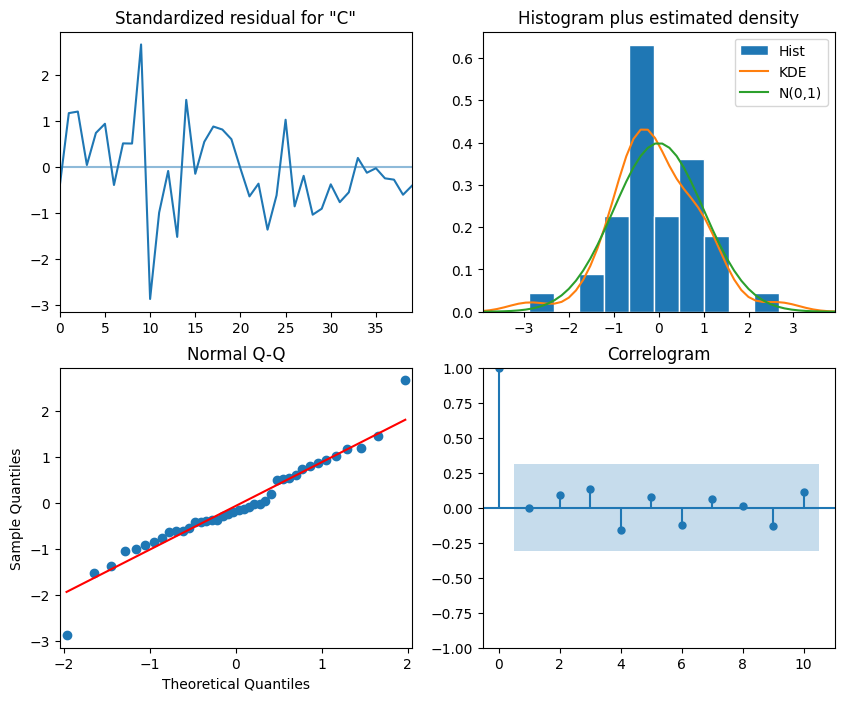


Forecasted Cartons for the Next 12 Months (ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá460⁄Øÿ±ŸÖŸä):
Month 41: 697 cartons
Month 42: 1,362 cartons
Month 43: 2,167 cartons
Month 44: 2,490 cartons
Month 45: 2,801 cartons
Month 46: 3,802 cartons
Month 47: 3,630 cartons
Month 48: 3,641 cartons
Month 49: 3,795 cartons
Month 50: 4,305 cartons
Month 51: 4,110 cartons
Month 52: 4,197 cartons

Average Monthly Forecast for ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá460⁄Øÿ±ŸÖŸä: 3,083 cartons


In [31]:
#Sales Forecast for the Second Top Product
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller


#Ensure MonthNumeric is treated as an ordered index
Data["YearMonth"] = Data["Year"].astype(str) + "-" + Data["MonthNumeric"].astype(str)

#Filter data for the target product group
ProductData = Data[Data['ProductCode'] == 1102001]
MonthlyCartons = ProductData.groupby("YearMonth")["Cartons"].sum()
MonthlyCartons.index = range(1, len(MonthlyCartons) + 1)

# 1. Data Exploration & Stationarity Check
plt.figure(figsize=(10, 6))
plt.plot(MonthlyCartons)
plt.title(f'Monthly Cartons for Product Code 1102001')
plt.xlabel('Month Index')
plt.ylabel('Cartons')
plt.grid(True)
plt.show()

# Perform ADF test for stationarity
adf_test = adfuller(MonthlyCartons)
print("\nADF Test Results:")
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {value}')
if adf_test[1] <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely non-stationary.")

# 2. Manually specify SIMPLER ARIMA model order
manual_order = (1, 0, 1) # Simpler order (p, d, q)
manual_seasonal_order = (1, 0, 1, 12) # Simpler seasonal order (P, D, Q, m)

print(f"\nManual ARIMA Model Order: {manual_order}, Seasonal Order: {manual_seasonal_order}")


# 3. Train and Forecast with Manual Order
try:
    model_fit = ARIMA(MonthlyCartons, order=manual_order,
                      seasonal_order=manual_seasonal_order).fit()

    # 4. Model Diagnostics
    plt.figure(figsize=(10, 8))
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.show()

    forecast = model_fit.forecast(steps=12)
except Exception as e:
    print(f"Error forecasting for {'ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá460⁄Øÿ±ŸÖŸä'}: {e}")

#Print Forecasted Cartons
print(f"\nForecasted Cartons for the Next 12 Months ({'ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá460⁄Øÿ±ŸÖŸä'}):")
for i, value in enumerate(forecast, start=len(MonthlyCartons) + 1):
    print(f"Month {i}: {value:,.0f} cartons")

#Calculate the average of the forecasted values
AverageForecast = forecast.mean()
print(f"\nAverage Monthly Forecast for {'ÿ≥ÿ≥ ÿ®ÿ∑ÿ±Ÿä ⁄©⁄ÜÿßŸæ ÿ≥ÿßÿØŸá460⁄Øÿ±ŸÖŸä'}: {AverageForecast:,.0f} cartons")

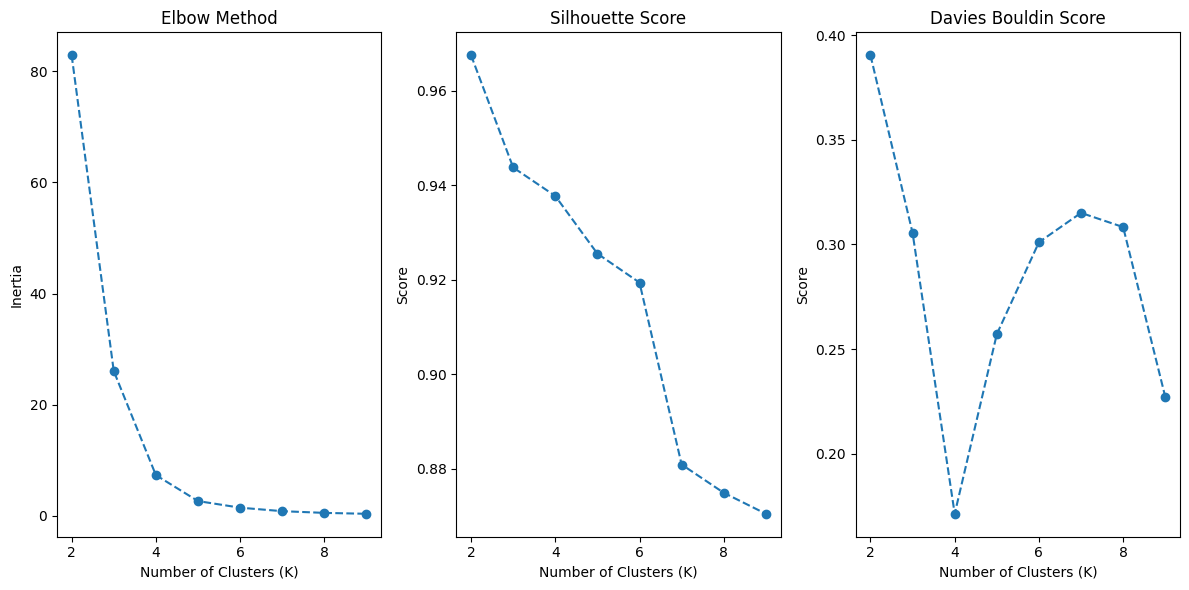

In [41]:
#Apply K-Means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

#Selecting customer data related
CustomerData = Data.groupby('CustomerName')[['Cartons', 'Units']].sum().reset_index()

#Normalize data
scaler = StandardScaler()
ScaledData = scaler.fit_transform(CustomerData[['Cartons', 'Units']])

#Determine the optimal clusters (elbow method and silhouette score)
optimal = []
silhouette_scores = []
davies_bouldin_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(ScaledData)
    optimal.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(ScaledData, labels))
    davies_bouldin_scores.append(davies_bouldin_score(ScaledData, labels))

#Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(range(2, 10), optimal, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

#Plot silhouette scores
plt.subplot(1, 3, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

#Plot davies bouldin scores
plt.subplot(1, 3, 3)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o', linestyle='--')
plt.title('Davies Bouldin Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

#Apply K-Means clustering with the chosen number of clusters
chosen_k = 2
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
CustomerData['Cluster'] = kmeans.fit_predict(ScaledData)
print('\n')

#Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=CustomerData, x='Cartons', y='Units', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Cartons')
plt.ylabel('Units')
plt.show()

In [51]:
#Create summary table by grouping by 'Cluster'

Data = pd.merge(Data, CustomerData[['CustomerName', 'Cluster']], on='CustomerName', how='left')

summary_table = Data.groupby(['CustomerName', 'Cluster'])[['Cartons', 'NetSales']].sum().reset_index().groupby('Cluster').agg(
    Net_Sales=('NetSales', 'sum'),
    Units_Sold=('Cartons', 'sum'),
    Count=('CustomerName', 'nunique')  # Count unique customers in each cluster
).reset_index()

# Format numbers with commas for readability
summary_table['Net_Sales'] = summary_table['Net_Sales'].apply(lambda x: f"{x:,.0f}")
summary_table['Units_Sold'] = summary_table['Units_Sold'].apply(lambda x: f"{x:,.0f}")

# Display the final formatted table
print("\nüîπ Clustering Results Table:")
print(summary_table.to_markdown(index=False))  # Prints a nice table format

# If using Jupyter Notebook, display the table properly
display(summary_table)


üîπ Clustering Results Table:
|   Cluster | Net_Sales         | Units_Sold   |   Count |
|----------:|:------------------|:-------------|--------:|
|         0 | 5,419,736,554,911 | 1,622,379    |     176 |
|         1 | 5,573,851,249,329 | 1,671,151    |       2 |


Cluster          Net_Sales Units_Sold  Count
0        0  5,419,736,554,911  1,622,379    176
1        1  5,573,851,249,329  1,671,151      2